In [1]:
import pandas as pd
import numpy as np
import haversine as hs
from datetime import datetime
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv('train.csv')
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [3]:
data.replace({"NaN": np.nan}, regex=True, inplace = True)
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [4]:
data.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [5]:
data['Distance'] = 0
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,0
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,0
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,0
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,0


In [6]:
for i in range(len(data)):
    loc1 = (data['Restaurant_latitude'][i], data['Restaurant_longitude'][i])
    loc2 = (data['Delivery_location_latitude'][i], data['Delivery_location_longitude'][i])
    # print(hs.haversine(loc1,loc2))
    data['Distance'][i] = hs.haversine(loc1,loc2)

data

C:\Users\user\AppData\Local\Temp/ipykernel_2336/2182816085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance'][i] = hs.haversine(loc1,loc2)


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6


In [7]:
data['Time_prep'] = 0
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1,0
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11,0
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4,0
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6,0


In [8]:
data.dropna(axis = 0, how = 'all', inplace = True)
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,0
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,0
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,0
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,0
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1,0
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11,0
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4,0
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6,0


In [9]:
# data2 = data[data['Restaurant_latitude']!="NaN"]
# data2 = data2[data2['Time_Orderd']!="NaN"]
# data2
data = data[data["Time_Orderd"].str.contains("NaN") == False].reset_index()
data = data[data["Time_Order_picked"].str.contains("NaN") == False].reset_index()
# data.reset_index()
data.head(50)

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep
0,0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,0
1,1,1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,0
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,0
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,0
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,0
5,5,5,0x9bb4,HYDRES09DEL03,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,(min) 26,4,0
6,6,6,0x95b4,RANCHIRES15DEL01,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 40,16,0
7,7,7,0x9eb2,MYSRES15DEL02,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,(min) 32,20,0
8,8,8,0x1102,HYDRES05DEL02,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 34,19,0
9,9,9,0xcdcd,DEHRES17DEL01,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,(min) 46,10,0


In [10]:
for i in range(len(data)):
    t1 = datetime.strptime(data['Time_Orderd'][i], "%H:%M:%S")
    t2  =datetime.strptime(data['Time_Order_picked'][i], "%H:%M:%S")
#     print(t1.time(), t2.time())
    diff = t2-t1
    sec = diff.total_seconds()
    minute = sec/60
    data['Time_prep'][i] = minute

data

C:\Users\user\AppData\Local\Temp/ipykernel_2336/402213021.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time_prep'][i] = minute


,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep
0,0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,15
1,1,1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,5
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,15
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,10
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1,10
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11,15
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4,-1425
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6,5


In [11]:
data = data.drop(['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude'], axis=1)
data = data.drop(['Time_Orderd', 'Time_Order_picked'], axis=1)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep
0,0,0,0x4607,INDORES13DEL02,37,4.9,19-03-2022,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,15
1,1,1,0xb379,BANGRES18DEL02,34,4.5,25-03-2022,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,5
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,19-03-2022,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,15
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,05-04-2022,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,10
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,26-03-2022,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,24-03-2022,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1,10
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,16-02-2022,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11,15
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,11-03-2022,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4,-1425
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,07-03-2022,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6,5


In [12]:
data['Weather'] = 0
for i in range(len(data)):
    str1 = data['Weatherconditions'][i]
    cond = str1.split(' ')
    data['Weather'][i] = cond[1]

data = data.drop(['Weatherconditions'], axis=1)

C:\Users\user\AppData\Local\Temp/ipykernel_2336/650444190.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Weather'][i] = cond[1]
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
data = data.drop(['Order_Date'], axis=1)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep,Weather
0,0,0,0x4607,INDORES13DEL02,37,4.9,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,15,Sunny
1,1,1,0xb379,BANGRES18DEL02,34,4.5,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,5,Stormy
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,15,Sandstorms
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,10,Sunny
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,15,Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1,10,Windy
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11,15,Windy
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4,-1425,Cloudy
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6,5,Cloudy


In [14]:
data['Time_taken'] = 0
for i in range(len(data)):
    list2 = data['Time_taken(min)'][i]
    str2 = list2.split(' ')
    data['Time_taken'][i] = int(str2[1])
data

C:\Users\user\AppData\Local\Temp/ipykernel_2336/2928086979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time_taken'][i] = int(str2[1])


,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,High,2,Snack,motorcycle,0,No,Urban,(min) 24,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26,6,5,Cloudy,26


In [15]:
data = data.drop(['Time_taken(min)'], axis=1)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,High,2,Snack,motorcycle,0,No,Urban,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,Jam,2,Snack,scooter,1,No,Metropolitian,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,Low,0,Drinks,motorcycle,1,No,Urban,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,Medium,0,Buffet,motorcycle,1,No,Metropolitian,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,High,1,Snack,scooter,1,No,Metropolitian,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,High,1,Meal,motorcycle,0,No,Metropolitian,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,Jam,0,Buffet,motorcycle,1,No,Metropolitian,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,Low,1,Drinks,scooter,0,No,Metropolitian,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,High,0,Snack,motorcycle,1,No,Metropolitian,6,5,Cloudy,26


In [16]:
# data = pd.get_dummies(data, columns = ['Road_traffic_density'])
# data

In [17]:
order_type = data['Type_of_order'].unique()
for i in range(len(order_type)):
    data['Type_of_order'] = data['Type_of_order'].replace(order_type[i], i)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,High,2,0,motorcycle,0,No,Urban,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,Jam,2,0,scooter,1,No,Metropolitian,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,Low,0,1,motorcycle,1,No,Urban,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,Medium,0,2,motorcycle,1,No,Metropolitian,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,High,1,0,scooter,1,No,Metropolitian,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,High,1,3,motorcycle,0,No,Metropolitian,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,Jam,0,2,motorcycle,1,No,Metropolitian,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,Low,1,1,scooter,0,No,Metropolitian,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,High,0,0,motorcycle,1,No,Metropolitian,6,5,Cloudy,26


In [18]:
# data = pd.get_dummies(data, columns = ['Type_of_order'])
# data

In [19]:
# data = pd.get_dummies(data, columns = ['Type_of_vehicle'])
# data

In [20]:
data['Type_of_vehicle'] = data['Type_of_vehicle'].replace('motorcycle ', 0)
data['Type_of_vehicle'] = data['Type_of_vehicle'].replace('scooter ', 1)
data['Type_of_vehicle'] = data['Type_of_vehicle'].replace('electric_scooter ', 2)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,High,2,0,0,0,No,Urban,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,Jam,2,0,1,1,No,Metropolitian,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,Low,0,1,0,1,No,Urban,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,Medium,0,2,0,1,No,Metropolitian,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,High,1,0,1,1,No,Metropolitian,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,High,1,3,0,0,No,Metropolitian,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,Jam,0,2,0,1,No,Metropolitian,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,Low,1,1,1,0,No,Metropolitian,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,High,0,0,0,1,No,Metropolitian,6,5,Cloudy,26


In [21]:
road_traffic = data['Road_traffic_density'].unique()
for i in range(len(road_traffic)):
    data['Road_traffic_density'] = data['Road_traffic_density'].replace(road_traffic[i], i)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,0,2,0,0,0,No,Urban,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,1,2,0,1,1,No,Metropolitian,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,2,0,1,0,1,No,Urban,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,3,0,2,0,1,No,Metropolitian,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,0,1,0,1,1,No,Metropolitian,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,0,1,3,0,0,No,Metropolitian,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,1,0,2,0,1,No,Metropolitian,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,2,1,1,1,0,No,Metropolitian,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,0,0,0,0,1,No,Metropolitian,6,5,Cloudy,26


In [22]:
festival = data['Festival'].unique()
for i in range(len(festival)):
    data['Festival'] = data['Festival'].replace(festival[i], i)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,0,2,0,0,0,0.0,Urban,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,1,2,0,1,1,0.0,Metropolitian,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,2,0,1,0,1,0.0,Urban,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,3,0,2,0,1,0.0,Metropolitian,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,0,1,0,1,1,0.0,Metropolitian,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,0,1,3,0,0,0.0,Metropolitian,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,1,0,2,0,1,0.0,Metropolitian,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,2,1,1,1,0,0.0,Metropolitian,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,0,0,0,0,1,0.0,Metropolitian,6,5,Cloudy,26


In [23]:
city = data['City'].unique()
for i in range(len(city)):
    data['City'] = data['City'].replace(city[i], i)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,0,2,0,0,0,0.0,0.0,3,15,Sunny,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,1,2,0,1,1,0.0,1.0,20,5,Stormy,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,2,0,1,0,1,0.0,0.0,1,15,Sandstorms,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,3,0,2,0,1,0.0,1.0,7,10,Sunny,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,0,1,0,1,1,0.0,1.0,6,15,Cloudy,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,0,1,3,0,0,0.0,1.0,1,10,Windy,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,1,0,2,0,1,0.0,1.0,11,15,Windy,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,2,1,1,1,0,0.0,1.0,4,-1425,Cloudy,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,0,0,0,0,1,0.0,1.0,6,5,Cloudy,26


In [24]:
weather = data['Weather'].unique()
for i in range(len(weather)):
    data['Weather'] = data['Weather'].replace(weather[i], i)
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,0,2,0,0,0,0.0,0.0,3,15,0,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,1,2,0,1,1,0.0,1.0,20,5,1,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,2,0,1,0,1,0.0,0.0,1,15,2,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,3,0,2,0,1,0.0,1.0,7,10,0,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,0,1,0,1,1,0.0,1.0,6,15,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,0,1,3,0,0,0.0,1.0,1,10,5,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,1,0,2,0,1,0.0,1.0,11,15,5,36
43859,43859,45590,0x4f8d,CHENRES08DEL03,30,4.9,2,1,1,1,0,0.0,1.0,4,-1425,3,16
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,0,0,0,0,1,0.0,1.0,6,5,3,26


In [25]:
data = data[data['Time_prep']>0]
data = data[data['Delivery_person_Age']!="NaN "]
data = data[data['Delivery_person_Ratings']!="NaN "]
data = data[data['Road_traffic_density']!="NaN "]
data = data[data['Vehicle_condition']!="NaN"]
data = data[data['Type_of_order']!="NaN"]
data = data[data['Type_of_vehicle']!="NaN"]
data = data[data['multiple_deliveries']!="NaN"]
data = data[data['Festival']!="NaN"]
data = data[data['City']!="NaN"]
data = data[data['Distance']!="NaN"]
data = data[data['Time_prep']!="NaN"]
data = data[data['Weather']!="NaN"]
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37,4.9,0,2,0,0,0,0.0,0.0,3,15,0,24
1,1,1,0xb379,BANGRES18DEL02,34,4.5,1,2,0,1,1,0.0,1.0,20,5,1,33
2,2,2,0x5d6d,BANGRES19DEL01,23,4.4,2,0,1,0,1,0.0,0.0,1,15,2,26
3,3,3,0x7a6a,COIMBRES13DEL02,38,4.7,3,0,2,0,1,0.0,1.0,7,10,0,21
4,4,4,0x70a2,CHENRES12DEL01,32,4.6,0,1,0,1,1,0.0,1.0,6,15,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43856,43856,45587,0x1178,RANCHIRES16DEL01,35,4.2,1,2,1,0,1,0.0,1.0,16,10,5,33
43857,43857,45588,0x7c09,JAPRES04DEL01,30,4.8,0,1,3,0,0,0.0,1.0,1,10,5,32
43858,43858,45589,0xd641,AGRRES16DEL01,21,4.6,1,0,2,0,1,0.0,1.0,11,15,5,36
43860,43860,45591,0x5eee,COIMBRES11DEL01,20,4.7,0,0,0,0,1,0.0,1.0,6,5,3,26


In [26]:
data['Delivery_person_Age'] = pd.to_numeric(data['Delivery_person_Age'])
data['Delivery_person_Ratings'] = pd.to_numeric(data['Delivery_person_Ratings'])
data['multiple_deliveries'] = pd.to_numeric(data['multiple_deliveries'])
data

,level_0,index,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,0,0x4607,INDORES13DEL02,37.0,4.9,0,2,0,0,0.0,0.0,0.0,3,15,0,24
1,1,1,0xb379,BANGRES18DEL02,34.0,4.5,1,2,0,1,1.0,0.0,1.0,20,5,1,33
2,2,2,0x5d6d,BANGRES19DEL01,23.0,4.4,2,0,1,0,1.0,0.0,0.0,1,15,2,26
3,3,3,0x7a6a,COIMBRES13DEL02,38.0,4.7,3,0,2,0,1.0,0.0,1.0,7,10,0,21
4,4,4,0x70a2,CHENRES12DEL01,32.0,4.6,0,1,0,1,1.0,0.0,1.0,6,15,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43856,43856,45587,0x1178,RANCHIRES16DEL01,35.0,4.2,1,2,1,0,1.0,0.0,1.0,16,10,5,33
43857,43857,45588,0x7c09,JAPRES04DEL01,30.0,4.8,0,1,3,0,0.0,0.0,1.0,1,10,5,32
43858,43858,45589,0xd641,AGRRES16DEL01,21.0,4.6,1,0,2,0,1.0,0.0,1.0,11,15,5,36
43860,43860,45591,0x5eee,COIMBRES11DEL01,20.0,4.7,0,0,0,0,1.0,0.0,1.0,6,5,3,26


In [27]:
data = data.drop(['Delivery_person_ID', 'ID', 'index', 'level_0'], axis=1)
data

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,37.0,4.9,0,2,0,0,0.0,0.0,0.0,3,15,0,24
1,34.0,4.5,1,2,0,1,1.0,0.0,1.0,20,5,1,33
2,23.0,4.4,2,0,1,0,1.0,0.0,0.0,1,15,2,26
3,38.0,4.7,3,0,2,0,1.0,0.0,1.0,7,10,0,21
4,32.0,4.6,0,1,0,1,1.0,0.0,1.0,6,15,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43856,35.0,4.2,1,2,1,0,1.0,0.0,1.0,16,10,5,33
43857,30.0,4.8,0,1,3,0,0.0,0.0,1.0,1,10,5,32
43858,21.0,4.6,1,0,2,0,1.0,0.0,1.0,11,15,5,36
43860,20.0,4.7,0,0,0,0,1.0,0.0,1.0,6,5,3,26


In [28]:
data['Distance'].describe()
data = data[data['Distance']<100]
data = data.reset_index()
data

,index,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather,Time_taken
0,0,37.0,4.9,0,2,0,0,0.0,0.0,0.0,3,15,0,24
1,1,34.0,4.5,1,2,0,1,1.0,0.0,1.0,20,5,1,33
2,2,23.0,4.4,2,0,1,0,1.0,0.0,0.0,1,15,2,26
3,3,38.0,4.7,3,0,2,0,1.0,0.0,1.0,7,10,0,21
4,4,32.0,4.6,0,1,0,1,1.0,0.0,1.0,6,15,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42872,43856,35.0,4.2,1,2,1,0,1.0,0.0,1.0,16,10,5,33
42873,43857,30.0,4.8,0,1,3,0,0.0,0.0,1.0,1,10,5,32
42874,43858,21.0,4.6,1,0,2,0,1.0,0.0,1.0,11,15,5,36
42875,43860,20.0,4.7,0,0,0,0,1.0,0.0,1.0,6,5,3,26


In [29]:
data.isna().sum()

index                        0
Delivery_person_Age        211
Delivery_person_Ratings    257
Road_traffic_density         0
Vehicle_condition            0
Type_of_order                0
Type_of_vehicle              0
multiple_deliveries        927
Festival                     0
City                         0
Distance                     0
Time_prep                    0
Weather                      0
Time_taken                   0
dtype: int64

In [30]:
data['multiple_deliveries'].head(30)

0     0.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     3.0
10    1.0
11    1.0
12    0.0
13    1.0
14    1.0
15    1.0
16    1.0
17    NaN
18    1.0
19    2.0
20    0.0
21    1.0
22    1.0
23    1.0
24    1.0
25    0.0
26    0.0
27    1.0
28    0.0
29    1.0
Name: multiple_deliveries, dtype: float64

In [31]:
# print(data['multiple_deliveries'][17])
# print(type(data['multiple_deliveries'][17]))
# data = data[data['multiple_deliveries']!=None]
# data.isna().sum()
# data['multiple_deliveries'] = data['multiple_deliveries'].dropna()


In [32]:
data['Delivery_person_Age'] = data['Delivery_person_Age'].fillna(data['Delivery_person_Age'].mean())
# data.isna().sum()
data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].fillna(data['Delivery_person_Ratings'].mean())
# data.isna().sum()

# data['multiple_deliveries'] = data['multiple_deliveries'].fillna(data['multiple_deliveries'].mean())
data['multiple_deliveries'].unique()
data['multiple_deliveries'].median()
data['multiple_deliveries'] = data['multiple_deliveries'].fillna(data['multiple_deliveries'].median())

In [33]:
data.isna().sum()

index                      0
Delivery_person_Age        0
Delivery_person_Ratings    0
Road_traffic_density       0
Vehicle_condition          0
Type_of_order              0
Type_of_vehicle            0
multiple_deliveries        0
Festival                   0
City                       0
Distance                   0
Time_prep                  0
Weather                    0
Time_taken                 0
dtype: int64

In [34]:
import seaborn as sns

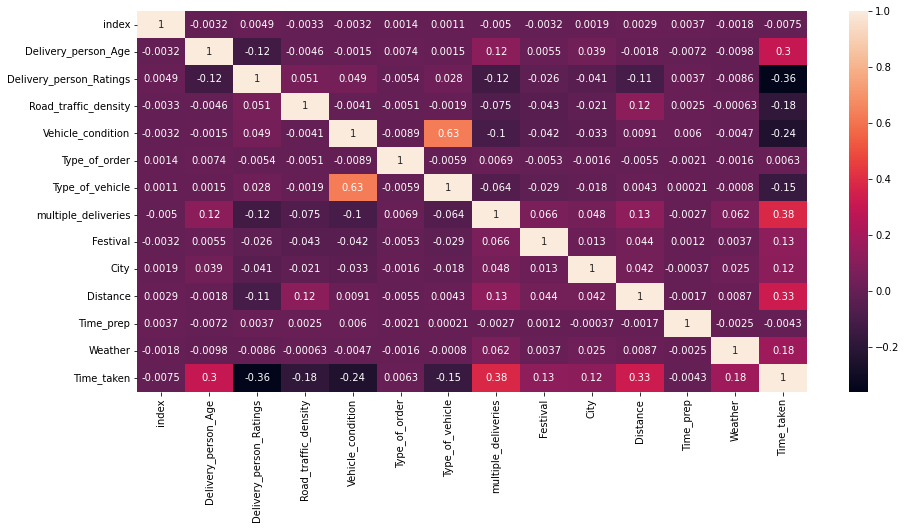

In [35]:
plt.figure(figsize=(15,7))
ax = sns.heatmap(data.corr(), annot=True)

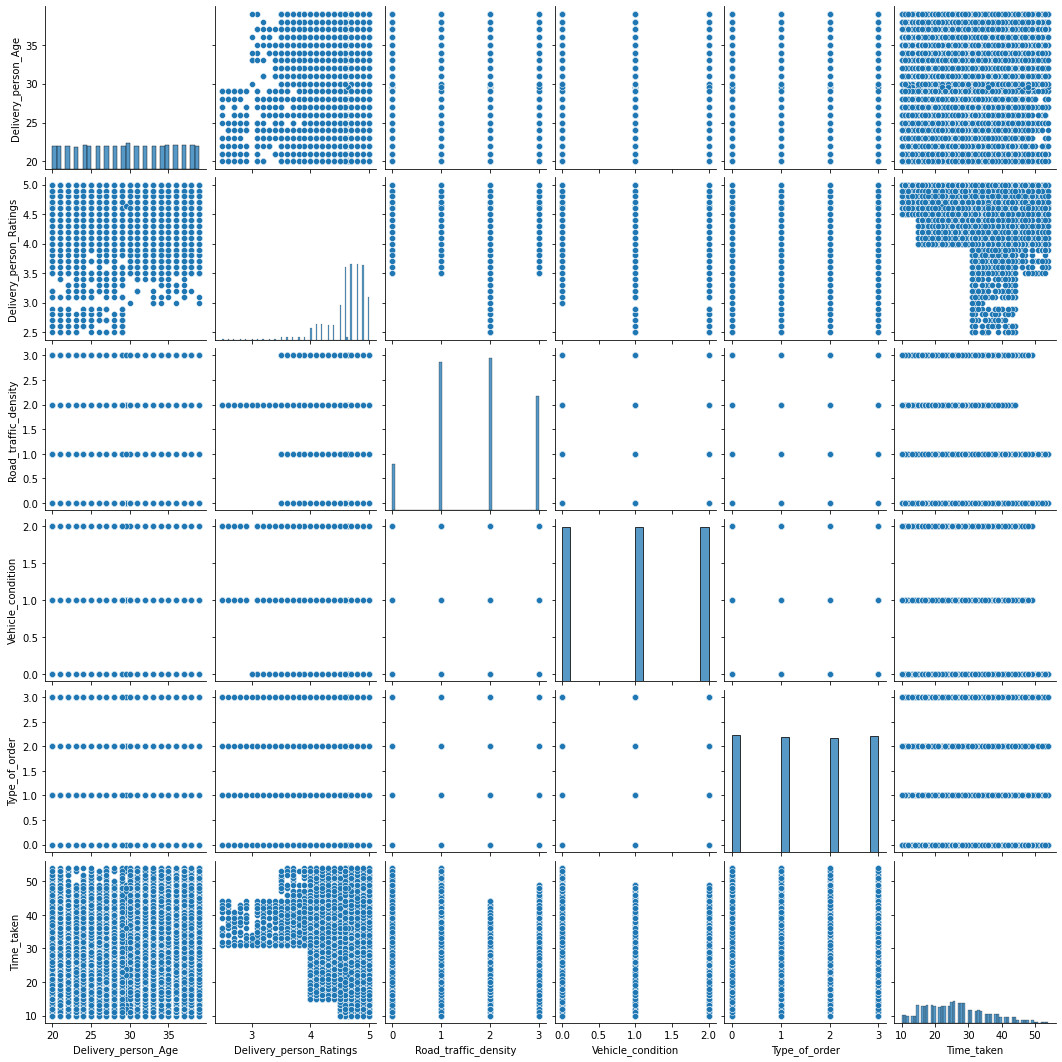

In [36]:
columns=data[['Delivery_person_Age','Delivery_person_Ratings','Road_traffic_density','Vehicle_condition','Type_of_order','Time_taken']]
sns.pairplot(columns)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = data.drop(['Time_taken', 'index'], axis=1)
x

,Delivery_person_Age,Delivery_person_Ratings,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Distance,Time_prep,Weather
0,37.0,4.9,0,2,0,0,0.0,0.0,0.0,3,15,0
1,34.0,4.5,1,2,0,1,1.0,0.0,1.0,20,5,1
2,23.0,4.4,2,0,1,0,1.0,0.0,0.0,1,15,2
3,38.0,4.7,3,0,2,0,1.0,0.0,1.0,7,10,0
4,32.0,4.6,0,1,0,1,1.0,0.0,1.0,6,15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
42872,35.0,4.2,1,2,1,0,1.0,0.0,1.0,16,10,5
42873,30.0,4.8,0,1,3,0,0.0,0.0,1.0,1,10,5
42874,21.0,4.6,1,0,2,0,1.0,0.0,1.0,11,15,5
42875,20.0,4.7,0,0,0,0,1.0,0.0,1.0,6,5,3


In [39]:
y = data[['Time_taken']]
y

,Time_taken
0,24
1,33
2,26
3,21
4,30
...,...
42872,33
42873,32
42874,36
42875,26


In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings

In [42]:
warnings.filterwarnings('ignore')

# Random Forest Regressor

In [43]:
# grid={"n_estimators":np.arange(50,250,50),
#       "min_samples_split":np.arange(1,5),
#        "min_samples_leaf":np.arange(0,3)}
# forest_regressor=RandomForestRegressor()
# model=GridSearchCV(forest_regressor, grid, cv=5)

# best_model=model.fit(x_train,y_train)
forest = RandomForestRegressor(n_estimators= 200, min_samples_split= 4, min_samples_leaf= 1)
forest.fit(x_train, y_train)


RandomForestRegressor(min_samples_split=4, n_estimators=200)

In [44]:
forest.score(x_test, y_test)

0.8362316949281142

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.4685844105862732

In [46]:
from sklearn import linear_model
reg2=linear_model.LassoLars(alpha=.1, normalize=False)
reg2.fit(x_train,y_train)

LassoLars(alpha=0.1, normalize=False)

In [47]:
reg2.score(x_train, y_train)

0.4663591526436842

In [48]:
# The maximum score we get is from using Random Forest Regressor which is 0.83